In [43]:
!pip install geopandas
!pip install shapely
!pip install pandas

import geopandas as gpd
import json
from shapely.geometry import Point, shape
from shapely.geometry import Polygon
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
municipios = gpd.read_file("/content/municipios.geojson")

In [45]:
# Convertir el GeoDataFrame a GeoJSON
municipios_geojson = json.loads(municipios.to_json())

In [46]:
# Crear un objeto Shapely Point
punto_ref = Point(1.2154362767838218, -77.28393604527683)

In [47]:
# Filtrar las características (features) que contienen el punto de referencia
poligono = [feature for feature in municipios_geojson['features'] if shape(feature['geometry']).contains(punto_ref)]

# Imprimir las características (features) que contienen el punto de referencia
for feature in poligono:
    print("El punto está dentro de este polígono:")
    print(feature)

In [48]:
# Crear lista de geometrías y propiedades
geometries = [shape(feature['geometry']) for feature in poligono]
properties = [feature['properties'] for feature in poligono]

In [49]:
# Crear un DataFrame temporal
properties_df = pd.DataFrame(properties)

In [50]:
# Revisar
properties_df['geometry'] = geometries
print(properties_df)

Empty DataFrame
Columns: [geometry]
Index: []


In [51]:
# Convertir a un GeoDataFrame
poligono_gdf = gpd.GeoDataFrame(properties_df, geometry='geometry')

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


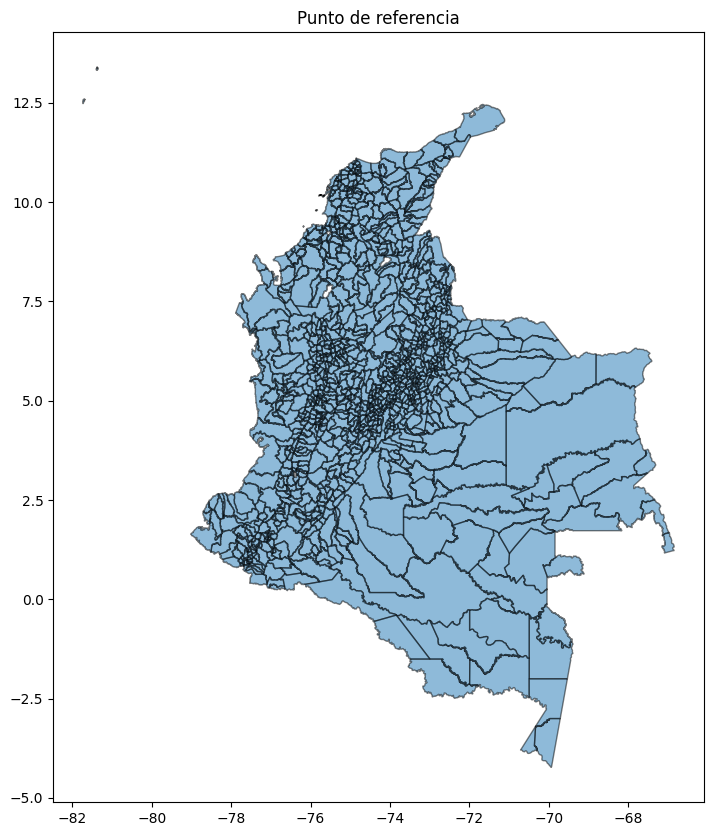

In [52]:
# Graficar el mapa
ax = municipios.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
zoom_size = 0.01
poligono_gdf.plot(ax=ax, color='#f9afad')
ax.set_title('Punto de referencia')
plt.show()

In [53]:
# Definir el tamaño del zoom
zoom_size = 0.01

In [74]:
polig2 = gpd.read_file("/content/map.geojson")

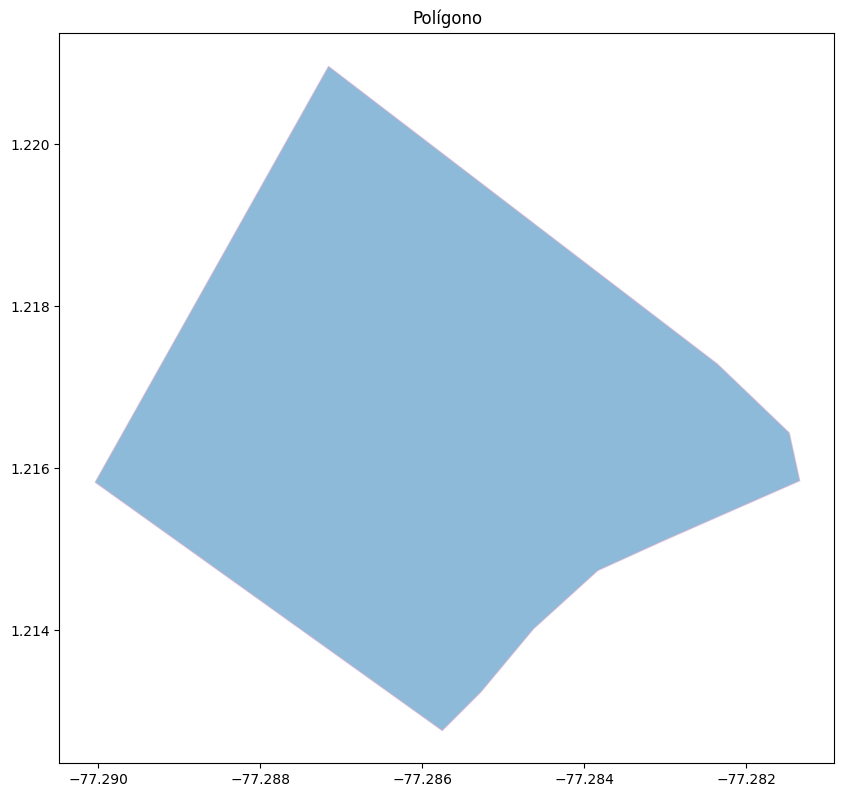

In [75]:
# Mostrar polígono
ax = polig2.plot(figsize=(10, 10), alpha=0.5, edgecolor='#d3a5c9')
zoom_size = 0.05
ax.set_title('Polígono')
plt.show()

In [54]:
# Obtener las coordenadas del poligono en geojson.io
vertices = [
    [-77.29004237497624, 1.2158314743524414],
    [-77.28575747368855, 1.2127662421299306],
    [-77.28527726923397, 1.2132463389729935],
    [-77.28463084016043, 1.214021879846669],
    [-77.28383665586969, 1.2147420247444813],
    [-77.28302400217721, 1.2151113297450564],
    [-77.28134328658591, 1.2158499395969784],
    [-77.28147257240084, 1.2164408273317093],
    [-77.28235910370194, 1.2172902282243285],
    [-77.28716114824826, 1.220964807263158],
    [-77.29004237497624, 1.2158314743524414]
]

In [55]:
# Convertir las coordenadas a tuplas (x, y)
vertices_tuples = [(x, y) for x, y in vertices]

In [57]:
# Crear el objeto Polygon
poligono = Polygon(vertices_tuples)

In [58]:
# Crear un GeoDataFrame con el polígono
poligono_gdf = gpd.GeoDataFrame(index=[0], geometry=[poligono])


In [69]:
# Calcular los límites del polígono y establecer un margen
x_min, y_min, x_max, y_max = poligono.bounds
margen = 0.15

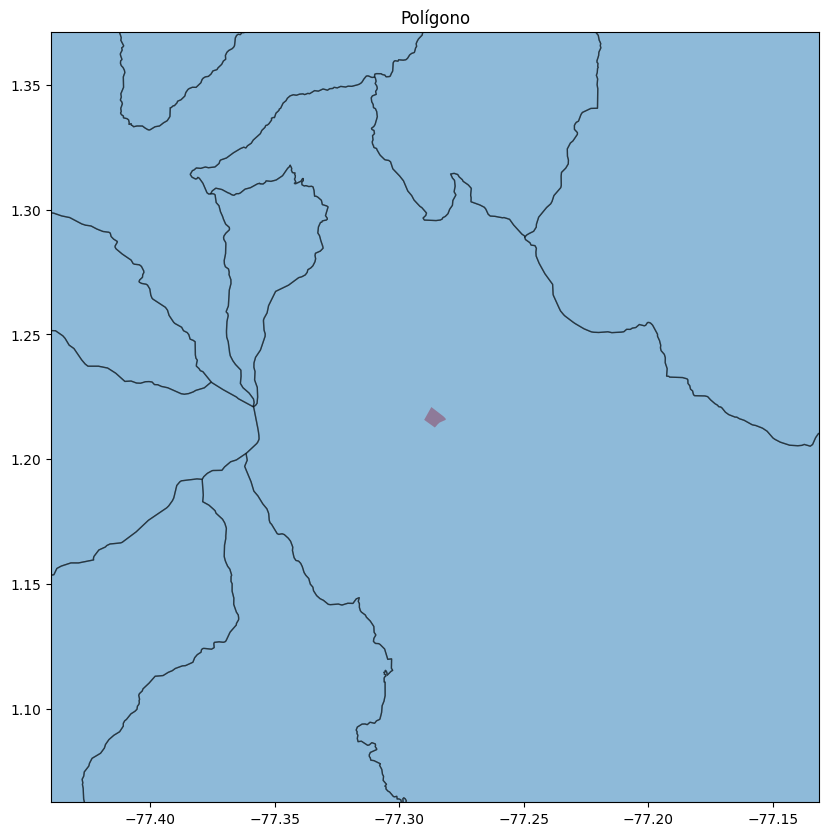

In [70]:
# Gráfica
ax = poligono_gdf.plot(figsize=(10, 10), color='red', alpha=0.5)
ax.set_xlim(x_min - margen, x_max + margen)
ax.set_ylim(y_min - margen, y_max + margen)
municipios.plot(ax=ax, alpha=0.5, edgecolor='k')
ax.set_title('Polígono')
plt.show()